# HRV Analysis

Dependecies: 
- [PhysioNet Cardiovascular Signal Toolbox](https://github.com/cliffordlab/PhysioNet-Cardiovascular-Signal-Toolbox)


In [1]:
addpath(genpath('../../PhysioNet-Cardiovascular-Signal-Toolbox'))
addpath('../../stress_and_addiction')

%plot native

In [2]:
startup

Adding the PhysioNet Cardiovascular Signal Toolbox to Matlab path
PhysioNet Cardiovascular Signal Toolbox successfully added to Matlab path


loading ...
plotting ...


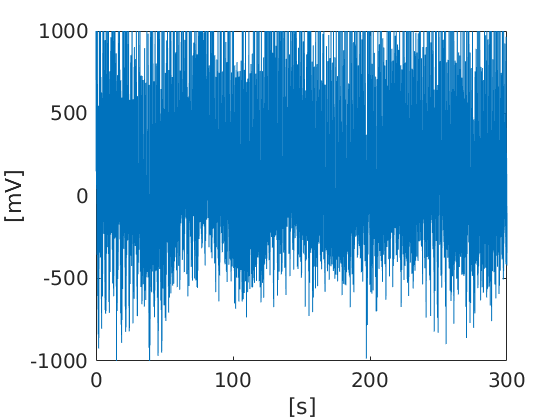

In [134]:
rootDataPath = '../../stress_and_addiction/data_lemon';
participantID = 'sub-010003';
subjectID = strcat(participantID, ':/ses-01:/func:');
filePath = strcat(participantID, '_ses-01_task-rest_acq-AP_run-01_recording-ecg_physio.tsv');
Fs = 1000; % frequency per second
range = 1:1:(5*60*Fs);

fullpath = fullfile(rootDataPath, subjectID, filePath);
cacheFilePath=strrep(fullpath,'.tsv','.mat');

if isfile(fullpath)
    disp("loading ...")
    
    % read tsv (check cache if exists)
    if isfile(cacheFilePath)
        loadedData = load(cacheFilePath);
        ecgData = loadedData.ecgData;
    else
        [output, header, raw] = tsvread(fullpath, range);

        % clean up NaN rows
        disp("cleaning ...")
        output(sum(isnan(output), 2) == size(output, 2), :) = [];
        
        ecgData = output(:,1);
        save(cacheFilePath, 'ecgData');
    end

    disp("plotting ...")
    tm = 0:1/Fs:(length(ecgData)-1)/Fs;
    plot(tm, ecgData)
    xlabel('[s]');
    ylabel('[mV]');
    
    ylim([-1000,1000]);
else
    disp("file not found")
end

In [ ]:
HRVparams = InitializeHRVparams('Demo');

% set the exact sampling frequency usign the one from the loaded signal
HRVparams.Fs = 1000;

ecg = ecgData(1:30000);
tm = 0:1/Fs:(length(ecg)-1)/Fs;

% call the function that perform peak detection
r_peaks = jqrs(ecg, HRVparams);

% plot the detected r_peaks on the top of the ecg signal
figure(1)
hold on;
plot(tm, ecg)
plot(r_peaks./Fs, ecg(r_peaks),'o');
    
% legend('ecg signal', 'detected R peaks')